# Lection6

## Deep Learning Regression

<img src="../img/00-how-a-network-learns.png" width=600px>

[Tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf)

[Daniel Bourke video 1](https://www.youtube.com/watch?v=tpCFfeUEGs8&t=0s)

[Daniel Bourke video 2](https://www.youtube.com/watch?v=ZUKz4125WNI&t=0s)

[Daniel Bourke github repo](https://github.com/mrdbourke/tensorflow-deep-learning/)





# Plan

1. Import TensorFlow
2. Data preparation
3. Modeling
4. Evaluation & Improving
5. Model save & load

In [1]:
import tensorflow as tf 
tf.__version__

'2.3.0'

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
X = tf.constant(np.arange(0,100,1).astype('float32'))
y= tf.constant(0.5*X+2)

In [ ]:
X_train=X[:80]
X_test=X[80:]
y_train=y[:80]
y_test=y[80:]

fig, sp = plt.subplots(figsize=(14,6))

sp.scatter(X_train,y_train)
sp.scatter(X_test,y_test)

 


In [15]:
from sklearn.linear_model import LinearRegression 

model1 = LinearRegression().fit(tf.reshape(X_train,(80,1)),y_train)

model1.score(tf.reshape(X_test,(20,1)),y_test)

y1_hat=model1.predict(tf.reshape(X_test,(20,1)))

In [ ]:
fig, sp = plt.subplots(figsize=(14,6))

sp.scatter(X_train,y_train)
sp.scatter(X_test,y_test)
sp.plot(X_test,y1_hat, c="white")

In [24]:
tf.random.set_seed(48)
# Create model 
model2 = tf.keras.Sequential([ 
    tf.keras.layers.Dense(1, activation='relu')
])

# Compile model 
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mae, mse

model2.compile(
    loss=mae, 
    optimizer=SGD(), 
    metrics=['mae','mse']
)

In [28]:
# Fit model 
history2 = model2.fit(X_train,y_train, epochs=5)

Epoch 1/5
3/3 [==============================] - 0s 2ms/step - loss: 7.3531 - mae: 7.3531 - mse: 81.6640
Epoch 2/5
3/3 [==============================] - 0s 6ms/step - loss: 6.6862 - mae: 6.6862 - mse: 80.8492
Epoch 3/5
3/3 [==============================] - 0s 3ms/step - loss: 8.5820 - mae: 8.5820 - mse: 148.5934
Epoch 4/5
3/3 [==============================] - 0s 996us/step - loss: 7.3738 - mae: 7.3738 - mse: 73.9712
Epoch 5/5
3/3 [==============================] - 0s 4ms/step - loss: 8.0067 - mae: 8.0067 - mse: 86.5290


In [ ]:
# model2.summary()

history2.history

In [33]:
model2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 999us/step - loss: 12.2763 - mae: 12.2763 - mse: 151.5473


[12.276275634765625, 12.276275634765625, 151.54733276367188]

In [ ]:
y2_hat=model2.predict(X_test)

y2_hat

y_test-y2_hat



In [67]:
tf.random.set_seed(48)
# Create model 
model3 = tf.keras.Sequential([ 
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile model 
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mae, mse

model3.compile(
    loss=mae, 
    optimizer=SGD(), 
    metrics=['mae']
)

In [68]:
model3.fit(X_train,y_train,epochs=10, verbose=1)

Epoch 1/10
3/3 [==============================] - 0s 2ms/step - loss: 14.1553 - mae: 14.1553
Epoch 2/10
3/3 [==============================] - 0s 999us/step - loss: 8.8096 - mae: 8.8096
Epoch 3/10
3/3 [==============================] - 0s 1ms/step - loss: 9.6584 - mae: 9.6584
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 9.1761 - mae: 9.1761
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 6.5064 - mae: 6.5064
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 8.8829 - mae: 8.8829
Epoch 7/10
3/3 [==============================] - 0s 5ms/step - loss: 6.4743 - mae: 6.4743
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 9.2889 - mae: 9.2889
Epoch 9/10
3/3 [==============================] - 0s 1000us/step - loss: 10.3863 - mae: 10.3863
Epoch 10/10
3/3 [==============================] - 0s 7ms/step - loss: 7.0824 - mae: 7.0824


In [70]:
y3_hat=model3.predict(X_test)

y_test-y3_hat

<tf.Tensor: shape=(20, 20), dtype=float32, numpy=
array([[ 7.8516045 ,  8.351604  ,  8.851604  ,  9.351604  ,  9.851604  ,
        10.351604  , 10.851604  , 11.351604  , 11.851604  , 12.351604  ,
        12.851604  , 13.351604  , 13.851604  , 14.351604  , 14.851604  ,
        15.351604  , 15.851604  , 16.351604  , 16.851604  , 17.351604  ],
       [ 7.426197  ,  7.926197  ,  8.426197  ,  8.926197  ,  9.426197  ,
         9.926197  , 10.426197  , 10.926197  , 11.426197  , 11.926197  ,
        12.426197  , 12.926197  , 13.426197  , 13.926197  , 14.426197  ,
        14.926197  , 15.426197  , 15.926197  , 16.426197  , 16.926197  ],
       [ 7.0007935 ,  7.5007935 ,  8.000793  ,  8.500793  ,  9.000793  ,
         9.500793  , 10.000793  , 10.500793  , 11.000793  , 11.500793  ,
        12.000793  , 12.500793  , 13.000793  , 13.500793  , 14.000793  ,
        14.500793  , 15.000793  , 15.500793  , 16.000793  , 16.500793  ],
       [ 6.575382  ,  7.075382  ,  7.575382  ,  8.075382  ,  8.575382  

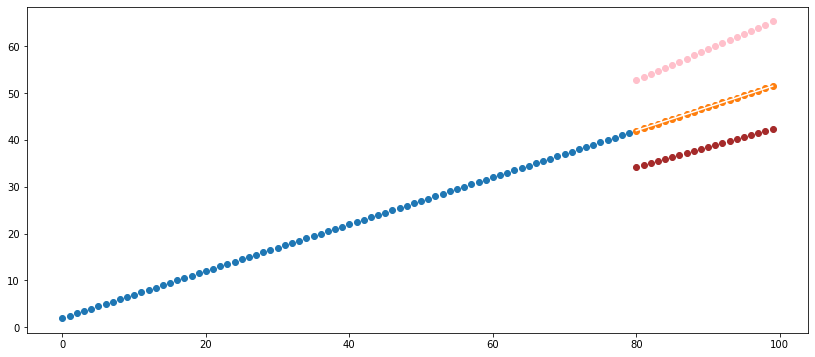

In [71]:
fig, sp = plt.subplots(figsize=(14,6))

sp.scatter(X_train,y_train)
sp.scatter(X_test,y_test)
sp.plot(X_test,y1_hat, c="white")
sp.scatter(X_test,y2_hat, c="pink")
sp.scatter(X_test,y3_hat, c="brown")

In [73]:
import pandas as pd

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [74]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [75]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [78]:
insurance=pd.get_dummies(insurance)

insurance.head(3)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,1,0,0,1,0,0,0,1
1,18,33.77,1,1725.5523,0,1,1,0,0,0,1,0
2,28,33.00,3,4449.4620,0,1,1,0,0,0,1,0


In [80]:
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

X.head(), y.head()


(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [81]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)

In [91]:
tf.random.set_seed=48

ins_model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

ins_model.compile(
    loss='mae',
    optimizer=Adam(),
    metrics=['mse']
)

In [84]:
X_train.shape

(1070, 11)

In [92]:
ins_history = ins_model.fit(X_train,y_train,epochs=10)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

34/34 [==============================] - 0s 3ms/step - loss: 13240.3555 - mse: 317761440.0000
Epoch 2/10
34/34 [==============================] - 0s 3ms/step - loss: 13221.1162 - mse: 317225120.0000
Epoch 3/10
34/34 [==============================] - 0s 4ms/step - loss: 13201.0986 - mse: 316659520.0000
Epoch 4/10
34/34 [==============================] - 0s 3ms/step - loss: 13180.1221 - mse: 316072448.0000
Epoch 5/10
34/34 [==============================] - 0s 3ms/step - loss: 13157.7949 - mse

In [93]:
ins_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1000us/step - loss: 13015.0078 - mse: 331288640.0000


[13015.0078125, 331288640.0]

<AxesSubplot:>

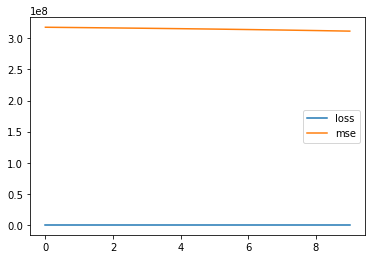

In [94]:
pd.DataFrame(ins_history.history).plot()